<a href="https://colab.research.google.com/github/chielgroen1998/RAAM/blob/main/RAAM_(momentum).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install yfinance
!pip install plotly


In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import time

# Define the ticker symbols for the stocks
ticker_symbols = [
    "AAPL", "MSFT", "GOOG", "AMZN", "NVDA", "META", "TSLA", "PEP", "AVGO",
    "COST", "CSCO", "ADBE", "NFLX", "TMUS", "TXN", "CMCSA", "QCOM", "INTC", "HON",
    "AMD", "AMGN", "INTU", "ISRG", "BKNG", "MDLZ", "ADI", "LRCX", "VRTX", "MU",
    "AMAT", "SBUX", "GILD", "MRNA", "ADP", "PANW", "FISV", "CSX", "REGN", "MNST",
    "KLAC", "MAR", "NXPI", "ORLY", "ADSK", "MCHP", "AEP", "KDP", "SNPS",
    "FTNT", "IDXX", "LULU", "EXC", "CTAS", "PAYX", "XEL", "PCAR", "ODFL", "VRSK",
    "WBA", "CDNS", "AZN", "DLTR", "EBAY", "BIIB", "ROST", "CRWD", "CHTR",
    "FAST", "PDD", "ANSS", "MRVL", "TEAM", "WDAY", "BKR", "DDOG", "ZS", "CEG",
    "KHC", "VRSN", "CTSH", "SWKS", "OKTA", "EA", "LCID", "BIDU", "ALGN",
    "MELI", "JD", "LI", "NTES", "ASML", "DXCM", "CPRT"
]

# Parameters - all UTC timestamps
startdate = '2010-01-01'
enddate = '2025-12-31'
cutoff_date = '2014-07-01'

mom_p = 20 #26
vol_p = 35
RSI_p = 40
ass_amount = 6
MA_p = 40
cor_p = 40 # monthly

# Create reference timestamps with timezone
START_TS = pd.Timestamp(startdate).tz_localize('UTC')
END_TS = pd.Timestamp(enddate).tz_localize('UTC')
CUTOFF_TS = pd.Timestamp(cutoff_date).tz_localize('UTC')

def download_stock_data(ticker):
    """
    Download stock data for a single ticker with improved error handling.
    """
    try:
        print(f"\nDownloading data for {ticker}...")

        # Create a Ticker object
        stock = yf.Ticker(ticker)

        # Download the historical data
        data = stock.history(
            start=startdate,
            end=enddate,
            interval='1wk',
            auto_adjust=True  # This ensures we get adjusted prices
        )

        if data.empty:
            print(f"No data available for {ticker}")
            return None

        # Extract the closing prices
        prices = data['Close']  # Use 'Close' instead of 'Adj Close' since auto_adjust=True

        # Verify we have actual price data
        if len(prices) == 0:
            print(f"No price data for {ticker}")
            return None

        print(f"{ticker}: Got {len(prices)} prices from {prices.index[0]} to {prices.index[-1]}")

        # Add a small delay to avoid rate limiting
        time.sleep(1)  # Increased delay to be more conservative

        return prices

    except Exception as e:
        print(f"Error downloading {ticker}: {str(e)}")
        return None

def main():
    print("Starting download of stock data...")

    # Download and store the data
    all_data = {}
    successful_downloads = 0
    failed_downloads = 0
    long_history_tickers = []

    # Convert cutoff date to timezone-aware pandas timestamp
    cutoff = pd.Timestamp(cutoff_date, tz='UTC')

    # First pass: Download all data and identify stocks with sufficient history
    for ticker in ticker_symbols:
        series = download_stock_data(ticker)
        if series is not None and not series.empty:
            # Ensure index is timezone aware
            if series.index.tz is None:
                series.index = series.index.tz_localize('UTC')
            # Check if the stock has data from before our cutoff date
            if series.index[0] <= CUTOFF_TS:
                long_history_tickers.append(ticker)
                all_data[ticker] = series
                successful_downloads += 1
                print(f"Successfully processed {ticker} (full history)")
            else:
                print(f"Skipping {ticker} - insufficient history (starts from {series.index[0]})")
                failed_downloads += 1
        else:
            failed_downloads += 1

    # Create DataFrame and save results
    if all_data:
        # Convert to DataFrame
        combined_data = pd.DataFrame(all_data)

        # Save to CSV
        combined_data.to_csv('combined_stock_data.csv')

        print("\nDownload Summary:")
        print(f"Successfully downloaded: {successful_downloads} stocks")
        print(f"Failed downloads: {failed_downloads} stocks")
        print(f"Stocks with complete history from 2014: {len(long_history_tickers)}")
        print(f"\nShape of combined data: {combined_data.shape}")
        print("\nDate range in data:")
        print(f"Start: {combined_data.index[0]}")
        print(f"End: {combined_data.index[-1]}")
        print(f"\nStocks in dataset: {len(combined_data.columns)}")
        print("\nFirst few rows of the data:")
        print(combined_data.head())

        # Print list of included stocks
        print("\nIncluded stocks with complete history:")
        print(', '.join(sorted(long_history_tickers)))

    else:
        print("\nNo data was successfully downloaded!")
        print(f"Attempted downloads: {len(ticker_symbols)}")
        print(f"Failed downloads: {failed_downloads}")

if __name__ == "__main__":
    main()

Starting download of stock data...

AAPL: Got 814 prices from 2010-01-01 00:00:00-05:00 to 2025-08-01 00:00:00-04:00
Successfully processed AAPL (full history)

MSFT: Got 814 prices from 2010-01-01 00:00:00-05:00 to 2025-08-01 00:00:00-04:00
Successfully processed MSFT (full history)

GOOG: Got 814 prices from 2010-01-01 00:00:00-05:00 to 2025-08-01 00:00:00-04:00
Successfully processed GOOG (full history)

AMZN: Got 814 prices from 2010-01-01 00:00:00-05:00 to 2025-08-01 00:00:00-04:00
Successfully processed AMZN (full history)

NVDA: Got 814 prices from 2010-01-01 00:00:00-05:00 to 2025-08-01 00:00:00-04:00
Successfully processed NVDA (full history)

META: Got 691 prices from 2012-05-14 00:00:00-04:00 to 2025-08-04 00:00:00-04:00
Successfully processed META (full history)

TSLA: Got 789 prices from 2010-06-28 00:00:00-04:00 to 2025-08-04 00:00:00-04:00
Successfully processed TSLA (full history)

PEP: Got 814 prices from 2010-01-01 00:00:00-05:00 to 2025-08-01 00:00:00-04:00
Successfu

ERROR:yfinance:$FISV: possibly delisted; no timezone found


No data available for FISV

CSX: Got 814 prices from 2010-01-01 00:00:00-05:00 to 2025-08-01 00:00:00-04:00
Successfully processed CSX (full history)

REGN: Got 814 prices from 2010-01-01 00:00:00-05:00 to 2025-08-01 00:00:00-04:00
Successfully processed REGN (full history)

MNST: Got 814 prices from 2010-01-01 00:00:00-05:00 to 2025-08-01 00:00:00-04:00
Successfully processed MNST (full history)

KLAC: Got 814 prices from 2010-01-01 00:00:00-05:00 to 2025-08-01 00:00:00-04:00
Successfully processed KLAC (full history)

MAR: Got 814 prices from 2010-01-01 00:00:00-05:00 to 2025-08-01 00:00:00-04:00
Successfully processed MAR (full history)

NXPI: Got 784 prices from 2010-08-02 00:00:00-04:00 to 2025-08-04 00:00:00-04:00
Successfully processed NXPI (full history)

ORLY: Got 814 prices from 2010-01-01 00:00:00-05:00 to 2025-08-01 00:00:00-04:00
Successfully processed ORLY (full history)

ADSK: Got 814 prices from 2010-01-01 00:00:00-05:00 to 2025-08-01 00:00:00-04:00
Successfully process

In [15]:
def load_stock_data(filepath='combined_stock_data.csv'):
    combined_data = pd.read_csv(filepath, index_col=0, parse_dates=True)
    combined_data.index = pd.to_datetime(combined_data.index, utc=True)
    return combined_data

combined_data = load_stock_data()

In [16]:
price_changes = combined_data.pct_change()
volatility = price_changes.rolling(window= vol_p ).std()
volatility_monthly = volatility.resample('M').last()
ranked_volatility = volatility_monthly.rank(axis=1, method='first')

ranked_volatility

/tmp/ipython-input-302948307.py:1: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipython-input-302948307.py:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



,AAPL,MSFT,GOOG,AMZN,NVDA,META,TSLA,PEP,AVGO,COST,...,SWKS,EA,BIDU,ALGN,MELI,JD,NTES,ASML,DXCM,CPRT
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-28 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-30 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-31 00:00:00+00:00,49.0,16.0,36.0,57.0,69.0,NaN,NaN,2.0,50.0,3.0,...,59.0,34.0,68.0,47.0,75.0,NaN,65.0,45.0,70.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-30 00:00:00+00:00,48.0,33.0,27.0,43.0,72.0,65.0,74.0,11.0,73.0,35.0,...,76.0,56.0,69.0,57.0,30.0,62.0,37.0,40.0,68.0,6.0
2025-05-31 00:00:00+00:00,53.0,23.0,30.0,41.0,69.0,64.0,77.0,6.0,73.0,33.0,...,76.0,28.0,62.0,57.0,29.0,25.0,55.0,47.0,75.0,38.0
2025-06-30 00:00:00+00:00,58.0,24.0,26.0,37.0,64.0,69.0,79.0,8.0,73.0,30.0,...,63.0,15.0,55.0,53.0,49.0,31.0,60.0,46.0,77.0,40.0


In [17]:
price_changes = combined_data.pct_change()

mask1 = combined_data < combined_data.shift(mom_p)

moving_average = combined_data.rolling(window=MA_p).mean()
mask2 = combined_data < moving_average

price_changes = price_changes.where(~(mask1 | mask2))

momentum = price_changes.rolling(window=mom_p).apply(lambda x: (x + 1).prod() - 1)

momentum_monthly = momentum.resample('M').last()

ranked_momentum = momentum_monthly.rank(axis=1, method='first', ascending=False)

ranked_momentum.to_csv('ranked_momentum.csv')

ranked_momentum

/tmp/ipython-input-3057405011.py:1: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipython-input-3057405011.py:12: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



,AAPL,MSFT,GOOG,AMZN,NVDA,META,TSLA,PEP,AVGO,COST,...,SWKS,EA,BIDU,ALGN,MELI,JD,NTES,ASML,DXCM,CPRT
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-28 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-31 00:00:00+00:00,18.0,NaN,NaN,41.0,NaN,NaN,NaN,25.0,14.0,40.0,...,37.0,29.0,2.0,11.0,NaN,NaN,49.0,NaN,48.0,NaN
2010-04-30 00:00:00+00:00,6.0,NaN,NaN,18.0,NaN,NaN,NaN,32.0,26.0,43.0,...,35.0,16.0,2.0,NaN,NaN,NaN,NaN,NaN,20.0,NaN
2010-05-31 00:00:00+00:00,7.0,NaN,NaN,37.0,NaN,NaN,NaN,26.0,17.0,NaN,...,38.0,20.0,2.0,NaN,NaN,NaN,NaN,NaN,34.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-30 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-30 00:00:00+00:00,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.0,NaN,3.0,NaN,NaN,NaN


In [18]:
pct_change_df = combined_data.pct_change()

correlation_means = []

for index, row in pct_change_df.iterrows():
    other_tickers = [ticker for ticker in pct_change_df.columns if ticker != index]
    correlation_mean = row.corr(pct_change_df[other_tickers].mean(axis=1))
    correlation_means.append(correlation_mean)

pct_change_df['Correlation_Mean'] = correlation_means
pct_change_df = pct_change_df.drop('Correlation_Mean', axis=1)

resampled_df = pct_change_df.resample('M').mean()
rolling_mean_df = resampled_df.rolling(window=cor_p).mean()
rolling_mean_df = rolling_mean_df.shift(-1)
rolling_mean_df = rolling_mean_df.iloc[:-1]

rankings_df = rolling_mean_df

ranked_correlation = rolling_mean_df.rank(axis=1, method='first')

ranked_correlation


/tmp/ipython-input-2708876130.py:1: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipython-input-2708876130.py:13: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



,AAPL,MSFT,GOOG,AMZN,NVDA,META,TSLA,PEP,AVGO,COST,...,SWKS,EA,BIDU,ALGN,MELI,JD,NTES,ASML,DXCM,CPRT
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-28 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-30 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-31 00:00:00+00:00,47.0,58.0,43.0,56.0,81.0,76.0,54.0,12.0,80.0,68.0,...,4.0,36.0,11.0,2.0,79.0,14.0,50.0,34.0,16.0,66.0
2025-04-30 00:00:00+00:00,29.0,54.0,35.0,61.0,81.0,77.0,65.0,8.0,80.0,68.0,...,5.0,22.0,6.0,2.0,78.0,7.0,48.0,43.0,27.0,51.0
2025-05-31 00:00:00+00:00,35.0,57.0,38.0,52.0,81.0,79.0,64.0,10.0,80.0,65.0,...,6.0,28.0,5.0,2.0,76.0,8.0,60.0,42.0,21.0,49.0


In [19]:
combined_data.index = pd.to_datetime(combined_data.index)

rsi_values = pd.DataFrame(index=combined_data.index)

for stock in combined_data.columns:
    stock_changes = combined_data[stock].pct_change()

    gain = stock_changes.clip(lower=0)
    loss = -stock_changes.clip(upper=0)

    avg_gain = gain.ewm(com=RSI_p, adjust=False).mean()
    avg_loss = loss.ewm(com=RSI_p, adjust=False).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    rsi_values[stock] = rsi

rsi_monthly = rsi_values.resample('M').last()

ranked_rsi = rsi_monthly.rank(axis=1, method='first', ascending=False)

# Print the ranked RSI
ranked_rsi

/tmp/ipython-input-1309934334.py:6: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipython-input-1309934334.py:6: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipython-input-1309934334.py:6: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipython-input-1309934334.py:6: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version.

,AAPL,MSFT,GOOG,AMZN,NVDA,META,TSLA,PEP,AVGO,COST,...,SWKS,EA,BIDU,ALGN,MELI,JD,NTES,ASML,DXCM,CPRT
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31 00:00:00+00:00,51.0,37.0,52.0,53.0,54.0,NaN,NaN,17.0,55.0,14.0,...,25.0,28.0,5.0,7.0,73.0,NaN,46.0,74.0,11.0,75.0
2010-02-28 00:00:00+00:00,33.0,65.0,62.0,35.0,66.0,NaN,NaN,12.0,27.0,20.0,...,19.0,64.0,3.0,10.0,53.0,NaN,47.0,46.0,44.0,58.0
2010-03-31 00:00:00+00:00,16.0,68.0,65.0,49.0,69.0,NaN,NaN,6.0,24.0,52.0,...,45.0,34.0,2.0,13.0,47.0,NaN,72.0,38.0,42.0,55.0
2010-04-30 00:00:00+00:00,11.0,50.0,71.0,42.0,73.0,NaN,NaN,17.0,40.0,56.0,...,26.0,36.0,2.0,47.0,46.0,NaN,70.0,65.0,27.0,45.0
2010-05-31 00:00:00+00:00,11.0,65.0,61.0,42.0,72.0,NaN,NaN,37.0,15.0,53.0,...,19.0,60.0,4.0,73.0,18.0,NaN,63.0,62.0,28.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-30 00:00:00+00:00,49.0,29.0,56.0,50.0,44.0,30.0,36.0,79.0,25.0,12.0,...,69.0,32.0,46.0,68.0,5.0,42.0,16.0,63.0,61.0,18.0
2025-05-31 00:00:00+00:00,73.0,18.0,56.0,39.0,23.0,27.0,22.0,80.0,12.0,20.0,...,62.0,42.0,61.0,74.0,6.0,68.0,7.0,52.0,37.0,78.0
2025-06-30 00:00:00+00:00,66.0,7.0,47.0,30.0,11.0,21.0,53.0,78.0,6.0,45.0,...,52.0,37.0,72.0,68.0,17.0,74.0,5.0,46.0,60.0,80.0


In [20]:
ranking_weights = pd.Series({
    'Momentum Score': 0,
    'RSI Score': 0.75,
    'Volatility Score': 0,
    'Correlation Score': 0.25
})

weighted_momentum = ranked_momentum * ranking_weights['Momentum Score']
weighted_rsi = ranked_rsi * ranking_weights['RSI Score']
weighted_volatility = ranked_volatility * ranking_weights['Volatility Score']
weighted_correlation = ranked_correlation * ranking_weights['Correlation Score']

cumulative_score = weighted_momentum + weighted_rsi + weighted_volatility + weighted_correlation

cumulative_score.to_csv('cumscore.csv', index=True)

cumulative_score

,AAPL,MSFT,GOOG,AMZN,NVDA,META,TSLA,PEP,AVGO,COST,...,SWKS,EA,BIDU,ALGN,MELI,JD,NTES,ASML,DXCM,CPRT
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-28 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-30 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-30 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-30 00:00:00+00:00,NaN,21.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,31.75,NaN,18.25,NaN,NaN,NaN


In [21]:
import pandas as pd

def process_portfolio_selections(cumulative_score, ass_amount):
    ranked_df = cumulative_score.apply(lambda x: x.nsmallest(ass_amount), axis=1)

    ranked_mask = ranked_df.notna()

    result_df = pd.DataFrame(index=ranked_df.index, columns=ranked_df.columns)
    for column in ranked_df.columns:
        result_df[column] = ranked_mask[column].map({True: column, False: 0})
    result_df.index = pd.to_datetime(result_df.index)
    result_df.index = result_df.index + pd.DateOffset(months=1)

    dates = []
    tickers = []

    for date, row in result_df.iterrows():
        valid_tickers = row[row != 0]
        if not valid_tickers.empty:
            dates.extend([date] * len(valid_tickers))
            tickers.extend(valid_tickers.index)

    non_zero_df = pd.DataFrame({
        'Date': dates,
        'Ticker': tickers
    })

    non_zero_df['Date'] = pd.to_datetime(non_zero_df['Date'])

    return non_zero_df

portfolio_selections = process_portfolio_selections(cumulative_score, ass_amount)

portfolio_selections.to_csv('portfolio_selections.csv', index=False)

print("\nPortfolio Selections Summary:")
print(f"Total number of selections: {len(portfolio_selections)}")
print(f"Date range: {portfolio_selections['Date'].min()} to {portfolio_selections['Date'].max()}")
print(f"Number of unique tickers: {portfolio_selections['Ticker'].nunique()}")
print("\nFirst few selections:")
print(portfolio_selections.head(50))
print(portfolio_selections.tail(6))


Portfolio Selections Summary:
Total number of selections: 876
Date range: 2013-04-30 00:00:00+00:00 to 2025-08-31 00:00:00+00:00
Number of unique tickers: 80

First few selections:
                        Date Ticker
0  2013-04-30 00:00:00+00:00   ADBE
1  2013-04-30 00:00:00+00:00    AEP
2  2013-04-30 00:00:00+00:00   GILD
3  2013-04-30 00:00:00+00:00    PEP
4  2013-04-30 00:00:00+00:00    WBA
5  2013-04-30 00:00:00+00:00    XEL
6  2013-05-30 00:00:00+00:00   ADBE
7  2013-05-30 00:00:00+00:00    AEP
8  2013-05-30 00:00:00+00:00   GILD
9  2013-05-30 00:00:00+00:00   MSFT
10 2013-05-30 00:00:00+00:00    PEP
11 2013-05-30 00:00:00+00:00    WBA
12 2013-06-30 00:00:00+00:00    AZN
13 2013-06-30 00:00:00+00:00   DXCM
14 2013-06-30 00:00:00+00:00   MSFT
15 2013-06-30 00:00:00+00:00     MU
16 2013-06-30 00:00:00+00:00    PEP
17 2013-06-30 00:00:00+00:00    WBA
18 2013-07-30 00:00:00+00:00   ADBE
19 2013-07-30 00:00:00+00:00    ADP
20 2013-07-30 00:00:00+00:00   CSCO
21 2013-07-30 00:00:00+00:

In [ ]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
from typing import Dict, List, Any


In [22]:
def calculate_stock_return(ticker: str, start_date: pd.Timestamp, end_date: pd.Timestamp) -> Dict[str, Any]:
    try:
        stock = yf.download(
            ticker,
            start=start_date,
            end=end_date + timedelta(days=1),
            progress=False,
            ignore_tz=True,
            auto_adjust=False
        )

        if stock.empty or len(stock) < 2:
            print(f"Warning: Insufficient data for {ticker} between {start_date} and {end_date}")
            return None

        first_price = float(stock['Adj Close'].iloc[0].item())
        last_price = float(stock['Adj Close'].iloc[-1].item())
        pct_change = ((last_price - first_price) / first_price) * 100

        return {
            'Start_Price': first_price,
            'End_Price': last_price,
            'Return_Pct': pct_change
        }
    except Exception as e:
        print(f"Error processing {ticker} for period {start_date} to {end_date}: {str(e)}")
        return None

def analyze_portfolio(df: pd.DataFrame) -> pd.DataFrame:
    results = []

    # Group by date to get monthly portfolios
    monthly_portfolios = df.groupby('Date')['Ticker'].apply(list).reset_index()

    total_tickers = sum(len(tickers) for tickers in monthly_portfolios['Ticker'])
    processed = 0

    for _, row in monthly_portfolios.iterrows():
        date = pd.to_datetime(row['Date'])
        tickers = row['Ticker']

        # Calculate start and end of month
        start_date = date.replace(day=1)
        end_date = (start_date + pd.offsets.MonthEnd(0))

        for ticker in tickers:
            return_data = calculate_stock_return(ticker, start_date, end_date)
            processed += 1

            if return_data is not None:
                results.append({
                    'Date': date,
                    'Ticker': ticker,
                    **return_data
                })

            # Print progress
            if processed % 100 == 0:
                print(f"Processed {processed}/{total_tickers} stocks")

    return pd.DataFrame(results)

def format_summary(summary_df: pd.DataFrame) -> pd.DataFrame:
    summary_df.index = summary_df.index.strftime('%Y-%m-%d')
    return summary_df

def print_analysis(returns_df: pd.DataFrame, summary_df: pd.DataFrame):
    print("\nPortfolio Analysis Summary:")
    print(f"Total periods analyzed: {len(summary_df)}")
    print(f"Total stocks analyzed: {len(returns_df)}")

    print("\nFirst few rows of monthly summary:")
    print(format_summary(summary_df.head()))

    print("\nOverall Statistics:")
    print(f"Average monthly return: {returns_df['Return_Pct'].mean():.2f}%")
    print(f"Best monthly return: {returns_df['Return_Pct'].max():.2f}%")
    print(f"Worst monthly return: {returns_df['Return_Pct'].min():.2f}%")
    print(f"Return standard deviation: {returns_df['Return_Pct'].std():.2f}%")

    # Calculate annualized statistics
    monthly_returns = returns_df.groupby('Date')['Return_Pct'].mean()
    annualized_return = ((1 + monthly_returns/100).prod() ** (12/len(monthly_returns)) - 1) * 100
    annualized_vol = monthly_returns.std() * np.sqrt(12)

    print(f"\nAnnualized Statistics:")
    print(f"Annualized Return: {annualized_return:.2f}%")
    print(f"Annualized Volatility: {annualized_vol:.2f}%")
    print(f"Sharpe Ratio (Rf=0): {(annualized_return/annualized_vol):.2f}")

if __name__ == "__main__":
    portfolio_df = pd.read_csv("portfolio_selections.csv")
    print("Starting portfolio analysis...")
    returns_df = analyze_portfolio(portfolio_df)

    # Generate summary
    summary_df = returns_df.groupby('Date').agg({
        'Return_Pct': [
            ('Mean Return %', 'mean'),
            ('Std Dev %', 'std'),
            ('Min Return %', 'min'),
            ('Max Return %', 'max'),
            ('Count', 'count')
        ]
    }).round(2)

    # Flatten column names
    summary_df.columns = summary_df.columns.get_level_values(1)

    # Save results
    returns_df.to_csv('stock_returns_detailed.csv', index=False)
    summary_df.to_csv('monthly_summary.csv')

    # Print analysis
    print_analysis(returns_df, summary_df)

Starting portfolio analysis...
Processed 100/876 stocks
Processed 200/876 stocks
Processed 300/876 stocks
Processed 400/876 stocks
Processed 500/876 stocks
Processed 600/876 stocks
Processed 700/876 stocks
Processed 800/876 stocks

Portfolio Analysis Summary:
Total periods analyzed: 149
Total stocks analyzed: 876

First few rows of monthly summary:
            Mean Return %  Std Dev %  Min Return %  Max Return %  Count
Date                                                                   
2013-04-30           5.44       1.28          3.92          7.47      6
2013-05-30          -0.21       7.02         -9.69          8.66      6
2013-06-30           1.30      11.45         -8.87         22.17      6
2013-07-30          -1.33       5.70         -7.33          5.14      6
2013-08-31          -4.79       3.32         -9.97          0.41      6

Overall Statistics:
Average monthly return: 1.32%
Best monthly return: 35.31%
Worst monthly return: -29.53%
Return standard deviation: 7.66%

An

/tmp/ipython-input-3805689027.py:31: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3805689027.py:31: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed

Creating performance charts...





Yearly Performance Comparison (%):
      Portfolio    SPY    QQQ
Date                         
2013       9.57  14.15  20.82
2014      35.16  13.45  19.12
2015      13.13   1.19   9.51
2016      30.02  12.00   7.11
2017      14.81  21.80  32.78
2018       0.23  -4.64  -0.20
2019      30.39  31.34  39.06
2020       5.64  18.41  48.46
2021      29.46  28.82  27.49
2022      -5.27 -18.26 -32.65
2023      15.60  26.24  54.84
2024       8.48  24.97  25.69
2025       3.34   8.52  10.51

Yearly Statistics:
      Return  Volatility  Sharpe  Sortino  Max Drawdown
Date                                                   
2013  0.0957      0.1215  0.6232   1.1158       -0.0606
2014  0.3516      0.1007  3.2909      NaN       -0.0310
2015  0.1313      0.1635  0.6806   1.3130       -0.0602
2016  0.3002      0.1859  1.5070   2.2034       -0.0264
2017  0.1481      0.1141  1.1227   2.7403       -0.0630
2018  0.0023      0.2342 -0.0757  -0.1318       -0.2081
2019  0.3039      0.0879  3.2305  11.2270     

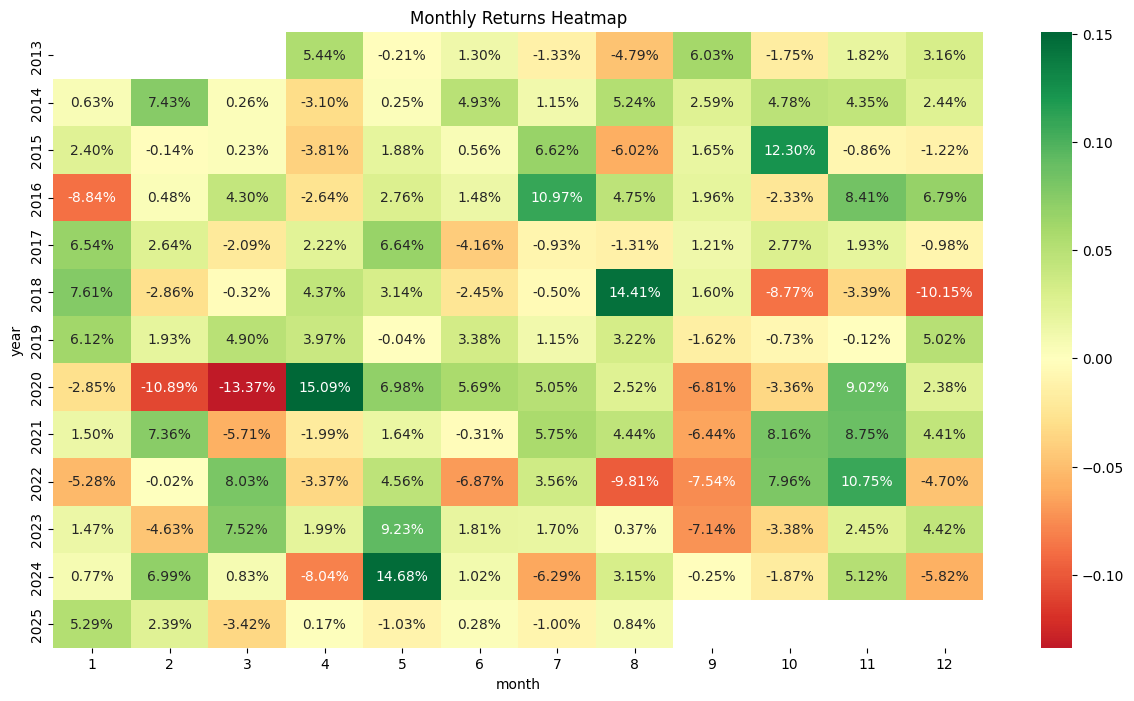


Portfolio Statistics:
Total Return: 448.69%
Annual Return: 14.69%
Monthly Volatility: 5.13%
Annual Volatility: 17.76%
Sharpe Ratio: 0.75
Max Drawdown: -25.00%


In [37]:
import pandas as pd
import numpy as np
import yfinance as yf
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def calculate_monthly_matrix(returns_series):
    """Convert monthly returns to a year x month matrix"""
    df = pd.DataFrame({'returns': returns_series})
    df['year'] = df.index.year
    df['month'] = df.index.month
    return df.pivot_table(index='year', columns='month', values='returns')

def create_performance_charts(returns_df, benchmark_tickers=['SPY', 'QQQ']):
    """Create performance visualization suite"""
    # Convert returns to decimal
    returns_df['Return_Pct'] = returns_df['Return_Pct'] / 100

    # Calculate portfolio performance
    monthly_returns = returns_df.groupby('Date')['Return_Pct'].mean()
    portfolio_cum_returns = (1 + monthly_returns).cumprod()

    # Download benchmark data
    benchmark_returns = {}
    for ticker in benchmark_tickers:
        print(f"\nDownloading {ticker} data...")
        benchmark_data = yf.download(ticker,
                                   start=returns_df['Date'].min(),
                                   end=returns_df['Date'].max(),
                                   interval='1mo')
        benchmark_returns[ticker] = benchmark_data['Close'].pct_change()

    # Create figures
    fig1 = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        subplot_titles=('Cumulative Returns (Log Scale)', 'Drawdowns'))

    # Cumulative Returns Plot
    fig1.add_trace(
        go.Scatter(x=portfolio_cum_returns.index, y=portfolio_cum_returns,
                  name='Portfolio', line=dict(color='blue')),
        row=1, col=1
    )

    for ticker, returns in benchmark_returns.items():
        cum_returns = (1 + returns).cumprod()
        fig1.add_trace(
            go.Scatter(x=cum_returns.index, y=cum_returns,
                      name=ticker, line=dict(dash='dash')),
            row=1, col=1
        )

    # Drawdowns Plot
    drawdowns = (portfolio_cum_returns / portfolio_cum_returns.cummax() - 1)
    fig1.add_trace(
        go.Scatter(x=drawdowns.index, y=drawdowns,
                  name='Portfolio Drawdowns', line=dict(color='red')),
        row=2, col=1
    )

    fig1.update_layout(height=800, title='Portfolio Performance Analysis')
    fig1.update_yaxes(type="log", row=1, col=1)

    # Create monthly returns matrix for heatmap
    monthly_matrix = calculate_monthly_matrix(monthly_returns)

    # Create yearly comparison table
    yearly_returns = monthly_returns.groupby(monthly_returns.index.year).apply(
        lambda x: (1 + x).prod() - 1
    )

    yearly_comparison = pd.DataFrame({
        'Portfolio': yearly_returns
    })

    for ticker, returns in benchmark_returns.items():
        yearly_comparison[ticker] = returns.groupby(returns.index.year).apply(
            lambda x: (1 + x).prod() - 1
        )

    # Create heatmap figure
    fig2 = plt.figure(figsize=(15, 8))
    sns.heatmap(monthly_matrix,
                cmap='RdYlGn',
                center=0,
                annot=True,
                fmt='.2%')
    plt.title('Monthly Returns Heatmap')

    # Calculate yearly statistics
    yearly_stats = pd.DataFrame(index=yearly_returns.index)

    for year in yearly_returns.index:
        year_returns = monthly_returns[monthly_returns.index.year == year]

        # Basic statistics
        yearly_stats.loc[year, 'Return'] = yearly_returns[year]
        yearly_stats.loc[year, 'Volatility'] = year_returns.std() * np.sqrt(12)
        yearly_stats.loc[year, 'Sharpe'] = (yearly_returns[year] - 0.02) / (year_returns.std() * np.sqrt(12))

        # Sortino Ratio
        downside_returns = year_returns[year_returns < 0]
        if len(downside_returns) > 0:
            yearly_stats.loc[year, 'Sortino'] = (yearly_returns[year] - 0.02) / (downside_returns.std() * np.sqrt(12))
        else:
            yearly_stats.loc[year, 'Sortino'] = np.nan

        # Maximum Drawdown
        cum_returns = (1 + year_returns).cumprod()
        yearly_stats.loc[year, 'Max Drawdown'] = (cum_returns / cum_returns.cummax() - 1).min()

    return {
        'performance_plot': fig1,
        'heatmap': fig2,
        'yearly_comparison': yearly_comparison,
        'yearly_stats': yearly_stats
    }

if __name__ == "__main__":
    # Read your data
    returns_df = pd.read_csv('stock_returns_detailed.csv')
    returns_df['Date'] = pd.to_datetime(returns_df['Date'])

    print("Creating performance charts...")
    analysis_results = create_performance_charts(returns_df)

    # Display results
    print("\nYearly Performance Comparison (%):")
    print(analysis_results['yearly_comparison'].round(4) * 100)

    print("\nYearly Statistics:")
    print(analysis_results['yearly_stats'].round(4))

    # Save results
    analysis_results['yearly_comparison'].to_csv('yearly_performance_comparison.csv')
    analysis_results['yearly_stats'].to_csv('yearly_statistics.csv')

    # Show plots
    analysis_results['performance_plot'].show()
    plt.show()  # Show the heatmap

    # Additional analytics
    monthly_returns = returns_df.groupby('Date')['Return_Pct'].mean()

    print("\nPortfolio Statistics:")
    print(f"Total Return: {(((1 + monthly_returns).prod() - 1) * 100):.2f}%")
    print(f"Annual Return: {(((1 + monthly_returns).prod() ** (12/len(monthly_returns)) - 1) * 100):.2f}%")
    print(f"Monthly Volatility: {(monthly_returns.std() * 100):.2f}%")
    print(f"Annual Volatility: {(monthly_returns.std() * np.sqrt(12) * 100):.2f}%")
    print(f"Sharpe Ratio: {((monthly_returns.mean() - 0.02/12) / (monthly_returns.std()) * np.sqrt(12)):.2f}")
    print(f"Max Drawdown: {(((1 + monthly_returns).cumprod() / (1 + monthly_returns).cumprod().cummax() - 1).min() * 100):.2f}%")

In [44]:
import plotly.express as px
import pandas as pd
import yfinance as yf # Import yfinance

# Get monthly portfolio returns
# Assuming 'monthly_returns' is available from previous execution or analysis_results
if 'monthly_returns' not in locals() and 'analysis_results' in locals() and 'monthly_returns' in analysis_results:
    portfolio_monthly_returns = analysis_results['monthly_returns']
elif 'monthly_returns' in locals():
     portfolio_monthly_returns = monthly_returns
else:
    print("Error: Portfolio monthly returns not found. Please run previous cells.")
    portfolio_monthly_returns = pd.Series(dtype='float64') # Create empty series to avoid further errors

# Ensure portfolio monthly returns index is timezone-aware (UTC)
if portfolio_monthly_returns.index.tz is None:
    portfolio_monthly_returns.index = portfolio_monthly_returns.index.tz_localize('UTC')
elif portfolio_monthly_returns.index.tz != 'UTC':
    portfolio_monthly_returns.index = portfolio_monthly_returns.index.tz_convert('UTC')


# Define benchmark tickers
benchmark_tickers = ['SPY', 'QQQ']
benchmark_monthly_returns = {}

# Download and process benchmark data within this cell
print("Downloading benchmark data...")
for ticker in benchmark_tickers:
    try:
        # Download daily data with auto_adjust=True
        benchmark_data = yf.download(ticker,
                                   start=portfolio_monthly_returns.index.min(), # Use portfolio start date
                                   end=portfolio_monthly_returns.index.max(), # Use portfolio end date
                                   interval='1d', # Download daily data
                                   auto_adjust=True,
                                   progress=False # Suppress download progress
                                   )
        if not benchmark_data.empty:
            # Resample to monthly (Month End) and calculate percentage change
            # Ensure benchmark monthly returns index is timezone-aware (UTC)
            monthly_returns_series = benchmark_data['Close'].resample('ME').ffill().pct_change()
            if monthly_returns_series.index.tz is None:
                monthly_returns_series.index = monthly_returns_series.index.tz_localize('UTC')
            elif monthly_returns_series.index.tz != 'UTC':
                 monthly_returns_series.index = monthly_returns_series.index.tz_convert('UTC')


            benchmark_monthly_returns[ticker] = monthly_returns_series
        else:
            print(f"Warning: Could not download data for {ticker}")
            # Create empty series with correct index and name, ensuring timezone awareness
            benchmark_monthly_returns[ticker] = pd.Series(dtype='float64', index=portfolio_monthly_returns.index, name=ticker).tz_localize('UTC')


    except Exception as e:
        print(f"Error downloading {ticker}: {str(e)}")
        # Create empty series with correct index and name, ensuring timezone awareness
        benchmark_monthly_returns[ticker] = pd.Series(dtype='float64', index=portfolio_monthly_returns.index, name=ticker).tz_localize('UTC')


# Combine all monthly returns into a single DataFrame
# Create a union of indices to ensure all dates are included and are timezone-aware
all_indices_list = [portfolio_monthly_returns.index]
for returns in benchmark_monthly_returns.values():
     if isinstance(returns.index, pd.Index):
        # Ensure benchmark indices are timezone-aware (UTC) before union
        if returns.index.tz is None:
             returns.index = returns.index.tz_localize('UTC')
        elif returns.index.tz != 'UTC':
             returns.index = returns.index.tz_convert('UTC')
        all_indices_list.append(returns.index)
     else:
        # Attempt to convert to Index if it's an array-like object, ensuring timezone awareness
        try:
            temp_index = pd.Index(returns.index)
            if temp_index.tz is None:
                temp_index = temp_index.tz_localize('UTC')
            elif temp_index.tz != 'UTC':
                temp_index = temp_index.tz_convert('UTC')
            all_indices_list.append(temp_index)
        except Exception as e:
            print(f"Warning: Could not get valid index for benchmark returns: {e}")
            pass # Skip this index if conversion fails


all_indices = all_indices_list[0]
for index in all_indices_list[1:]:
    all_indices = all_indices.union(index)


all_monthly_returns = pd.DataFrame(index=all_indices)

all_monthly_returns['Portfolio'] = portfolio_monthly_returns.reindex(all_indices)

for ticker, returns in benchmark_monthly_returns.items():
    # Ensure benchmark returns index is timezone-aware (UTC) before reindexing
    if returns.index.tz is None:
        returns.index = returns.index.tz_localize('UTC')
    elif returns.index.tz != 'UTC':
        returns.index = returns.index.tz_convert('UTC')
    all_monthly_returns[ticker] = returns.reindex(all_indices)


# Calculate cumulative returns - fill NaNs before cumprod with forward fill
# Start with 1 for the initial value before applying monthly returns
cumulative_returns = (1 + all_monthly_returns).cumprod()
# Fill any NaNs that occur after the start of the data with forward fill
cumulative_returns = cumulative_returns.ffill() - 1


# Convert to percentage and melt for Plotly Express
melted_cumulative_returns = cumulative_returns.reset_index().melt(
    id_vars='Date', var_name='Asset', value_name='Cumulative Return (%)'
)

# Create the cumulative line plot
fig = px.line(melted_cumulative_returns, x='Date', y='Cumulative Return (%)', color='Asset',
              title='Cumulative Performance Comparison')

# Update line thickness
fig.update_traces(line=dict(width=1.5)) # Adjust the width as needed

fig.update_layout(xaxis_title='Date', yaxis_title='Cumulative Return (%)')
fig.show()

In [48]:
import plotly.express as px
import pandas as pd
import yfinance as yf # Import yfinance

# Load the original weekly combined data
try:
    combined_data = load_stock_data('combined_stock_data.csv')
except FileNotFoundError:
    print("Error: combined_stock_data.csv not found. Please run the data downloading cell first.")
    combined_data = pd.DataFrame() # Create empty DataFrame to avoid further errors

if not combined_data.empty:
    # Calculate weekly percentage changes
    weekly_returns = combined_data.pct_change()

    # Calculate portfolio weekly returns
    # Assuming equal weighting for portfolio returns for simplicity in this plot
    portfolio_weekly_returns = weekly_returns.mean(axis=1)


    # Define benchmark tickers
    benchmark_tickers = ['SPY', 'QQQ']
    benchmark_weekly_returns = {}

    # Download and process benchmark data on a weekly basis
    print("Downloading benchmark data (weekly)...")
    for ticker in benchmark_tickers:
        try:
            # Download weekly data with auto_adjust=True
            benchmark_data = yf.download(ticker,
                                       start=combined_data.index.min(), # Use combined data start date
                                       end=combined_data.index.max(), # Use combined data end date
                                       interval='1wk', # Download weekly data
                                       auto_adjust=True,
                                       progress=False # Suppress download progress
                                       )
            if not benchmark_data.empty:
                # Calculate percentage change
                benchmark_weekly_returns[ticker] = benchmark_data['Close'].pct_change()
            else:
                print(f"Warning: Could not download weekly data for {ticker}")
                benchmark_weekly_returns[ticker] = pd.Series(dtype='float64') # Add empty series

        except Exception as e:
            print(f"Error downloading weekly data for {ticker}: {str(e)}")
            benchmark_weekly_returns[ticker] = pd.Series(dtype='float64') # Add empty series


    # Combine all weekly returns into a single DataFrame
    # Create a union of indices to ensure all dates are included
    all_indices_list = [portfolio_weekly_returns.index] + [returns.index for returns in benchmark_weekly_returns.values()]
    all_indices = all_indices_list[0].union(*all_indices_list[1:])

    all_weekly_returns = pd.DataFrame(index=all_indices)

    all_weekly_returns['Portfolio'] = portfolio_weekly_returns.reindex(all_indices)

    for ticker, returns in benchmark_weekly_returns.items():
        all_weekly_returns[ticker] = returns.reindex(all_indices)


    # Calculate cumulative returns - fill NaNs after cumprod with forward fill
    # Start with 1 for the initial value before applying weekly returns
    cumulative_returns = (1 + all_weekly_returns.fillna(0)).cumprod() - 1


    # Convert to percentage and melt for Plotly Express
    melted_cumulative_returns = cumulative_returns.reset_index().melt(
        id_vars='Date', var_name='Asset', value_name='Cumulative Return (%)'
    )

    # Create the cumulative line plot
    fig = px.line(melted_cumulative_returns, x='Date', y='Cumulative Return (%)', color='Asset',
                  title='Smoother Cumulative Performance Comparison (Weekly Data)')

    # Update line thickness
    fig.update_traces(line=dict(width=1.5)) # Adjust the width as needed

    fig.update_layout(xaxis_title='Date', yaxis_title='Cumulative Return (%)')
    fig.show()
else:
    print("Cannot generate plot without combined stock data.")

/tmp/ipython-input-1216514461.py:14: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [49]:
import plotly.express as px
import pandas as pd
import yfinance as yf # Import yfinance

# Get monthly portfolio returns
# Assuming 'monthly_returns' is available from previous execution or analysis_results
if 'monthly_returns' not in locals() and 'analysis_results' in locals() and 'monthly_returns' in analysis_results:
    portfolio_monthly_returns = analysis_results['monthly_returns']
elif 'monthly_returns' in locals():
     portfolio_monthly_returns = monthly_returns
else:
    print("Error: Portfolio monthly returns not found. Please run previous cells.")
    portfolio_monthly_returns = pd.Series(dtype='float64') # Create empty series to avoid further errors

# Ensure portfolio monthly returns index is timezone-aware (UTC)
if portfolio_monthly_returns.index.tz is None:
    portfolio_monthly_returns.index = portfolio_monthly_returns.index.tz_localize('UTC')
elif portfolio_monthly_returns.index.tz != 'UTC':
    portfolio_monthly_returns.index = portfolio_monthly_returns.index.tz_convert('UTC')


# Define benchmark tickers
benchmark_tickers = ['SPY', 'QQQ']
benchmark_monthly_returns = {}

# Download and process benchmark data within this cell
print("Downloading benchmark data...")
for ticker in benchmark_tickers:
    try:
        # Download daily data with auto_adjust=True
        benchmark_data = yf.download(ticker,
                                   start=portfolio_monthly_returns.index.min(), # Use portfolio start date
                                   end=portfolio_monthly_returns.index.max(), # Use portfolio end date
                                   interval='1d', # Download daily data
                                   auto_adjust=True,
                                   progress=False # Suppress download progress
                                   )
        if not benchmark_data.empty:
            # Resample to monthly (Month End) and calculate percentage change
            # Ensure benchmark monthly returns index is timezone-aware (UTC)
            monthly_returns_series = benchmark_data['Close'].resample('ME').ffill().pct_change()
            if monthly_returns_series.index.tz is None:
                monthly_returns_series.index = monthly_returns_series.index.tz_localize('UTC')
            elif monthly_returns_series.index.tz != 'UTC':
                 monthly_returns_series.index = monthly_returns_series.index.tz_convert('UTC')


            benchmark_monthly_returns[ticker] = monthly_returns_series
        else:
            print(f"Warning: Could not download data for {ticker}")
            # Create empty series with correct index and name, ensuring timezone awareness
            benchmark_monthly_returns[ticker] = pd.Series(dtype='float64', index=portfolio_monthly_returns.index, name=ticker).tz_localize('UTC')


    except Exception as e:
        print(f"Error downloading {ticker}: {str(e)}")
        # Create empty series with correct index and name, ensuring timezone awareness
        benchmark_monthly_returns[ticker] = pd.Series(dtype='float64', index=portfolio_monthly_returns.index, name=ticker).tz_localize('UTC')


# Combine all monthly returns into a single DataFrame
# Create a union of indices to ensure all dates are included and are timezone-aware
all_indices_list = [portfolio_monthly_returns.index]
for returns in benchmark_monthly_returns.values():
     if isinstance(returns.index, pd.Index):
        # Ensure benchmark indices are timezone-aware (UTC) before union
        if returns.index.tz is None:
             returns.index = returns.index.tz_localize('UTC')
        elif returns.index.tz != 'UTC':
             returns.index = returns.index.tz_convert('UTC')
        all_indices_list.append(returns.index)
     else:
        # Attempt to convert to Index if it's an array-like object, ensuring timezone awareness
        try:
            temp_index = pd.Index(returns.index)
            if temp_index.tz is None:
                temp_index = temp_index.tz_localize('UTC')
            elif temp_index.tz != 'UTC':
                temp_index = temp_index.tz_convert('UTC')
            all_indices_list.append(temp_index)
        except Exception as e:
            print(f"Warning: Could not get valid index for benchmark returns: {e}")
            pass # Skip this index if conversion fails


all_indices = all_indices_list[0]
for index in all_indices_list[1:]:
    all_indices = all_indices.union(index)


all_monthly_returns = pd.DataFrame(index=all_indices)

all_monthly_returns['Portfolio'] = portfolio_monthly_returns.reindex(all_indices)

for ticker, returns in benchmark_monthly_returns.items():
    # Ensure benchmark returns index is timezone-aware (UTC) before reindexing
    if returns.index.tz is None:
        returns.index = returns.index.tz_localize('UTC')
    elif returns.index.tz != 'UTC':
        returns.index = returns.index.tz_convert('UTC')
    all_monthly_returns[ticker] = returns.reindex(all_indices)


# Calculate cumulative returns - fill NaNs before cumprod with forward fill
# Start with 1 for the initial value before applying monthly returns
cumulative_returns = (1 + all_monthly_returns).cumprod() - 1

# Convert to percentage and melt for Plotly Express
melted_cumulative_returns = cumulative_returns.reset_index().melt(
    id_vars='Date', var_name='Asset', value_name='Cumulative Return (%)'
)

# Create the cumulative line plot
fig = px.line(melted_cumulative_returns, x='Date', y='Cumulative Return (%)', color='Asset',
              title='Cumulative Performance Comparison')

# Update line thickness
fig.update_traces(line=dict(width=1.5)) # Adjust the width as needed

fig.update_layout(xaxis_title='Date', yaxis_title='Cumulative Return (%)')
fig.show()